<a href="https://colab.research.google.com/github/MarcusVRS-p/AulaFCE/blob/main/P2_FCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Questão 1

**A Programação Orientada a Equações (POE) é um paradigma que permite ao programador descrever um problema com foco em sua estrutura lógica, aproximando a modelagem computacional das equações matemáticas do processo físico.**

**(a) Explique como a POE difere da programação imperativa, considerando o papel do programador e o processo de obtenção da solução.**

A POE possui alguns aspectos diferentes da programação iterativa, principalmente na forma como o problema é descrito. Na programação imperativa, o programador define o passo a passo da solução de modo explícito (com o uso de loops, condicionais, atribuições), com variáveis mutáveis. Enquanto que na POE, o foco está nas relações entre as variáveis, usando equações declarativas e com variáveis imutáveis, deixando que o solucionador determine a ordem e a forma de resolução dessas equações.

**(b) Em que tipo de problema de engenharia a POE é mais vantajosa? Cite pelo menos um exemplo prático — diferente dos discutidos em sala.**

Normalmente, em aplicações de modelagem matemática, simulações ou em otimização de processos. Um exemplo prático é a aplicação de métodos numéricos para modelagem de problemas de transferência de calor transiente em compósitos laminados, no qual as equações de conservação de energia são naturalmente expressas na forma de equações diferenciais com diversas variáveis interligadas.

**(c) Um dos princípios mais valorizados da POE é a flexibilidade. O que esse princípio significa na prática? Por que ele é útil para o engenheiro químico?**

Significa que o modelo pode ser adaptado ou reutilizado sem a necessidade de reescrever toda a lógica de solução. Por exemplo, o mesmo conjunto de equações pode ser resolvido para diferentes variáveis, continuando funcional com poucas alterações no código.
Essa característica é muito útil para o engenheiro químico, uma vez que normalmente precisa ajustar modelos para diferentes condições e para mudanças de equipamento ou de propriedades, permitindo testar cenários, validar hipóteses e otimizar processos mais facilmente.

##Questão 2

**Ao desenvolver soluções computacionais, a organização do código é essencial para sua manutenção, reusabilidade e adaptação a novos cenários.**

**(a) Explique o papel da estrutura `@dataclass` em Python na organização dos códigos. Por que ela é especialmente útil em sistemas com muitos parâmetros de entrada?**

A estrutura `@dataclass` do Python é uma funcionalidade que permite criar classes de forma mais concisa e automática, principalmente para armazenar dados. Ela é útil em sistemas com muitos parâmetros de entrada pois agrupa variáveis relacionadas de forma clara e estruturada, melhora a legibilidade e o reuso e evita erros com ordem dos argumentos.

**(b) Por que se recomenda salvar as soluções em repositórios como o GitHub? Cite três benefícios práticos, relacionando-os com a prática profissional ou acadêmica.**

Controle de versão: Permite rastrear alterações no código ao longo do tempo, facilitando o retorno a versões anteriores, entendimento da evolução do projeto e identificação de bugs.
Compartilhamento com colegas e professores: Facilita o trabalho em equipe, permitindo que várias pessoas contribuam simultaneamente no mesmo projeto.
Reprodutibilidade dos códigos: Armazenar o código em um repositório versionado permite que outras pessoas possam reproduzir exatamente os mesmos resultados. Isso é fundamental em contextos acadêmicos, onde a reprodutibilidade é um princípio científico, e também em ambientes profissionais para garantir rastreabilidade de resultados.


##Questão 3

Concentração final em 24h a 35.0°C: 20.01 g/L
Concentração final em 24h a 50.0°C: 5.31 g/L


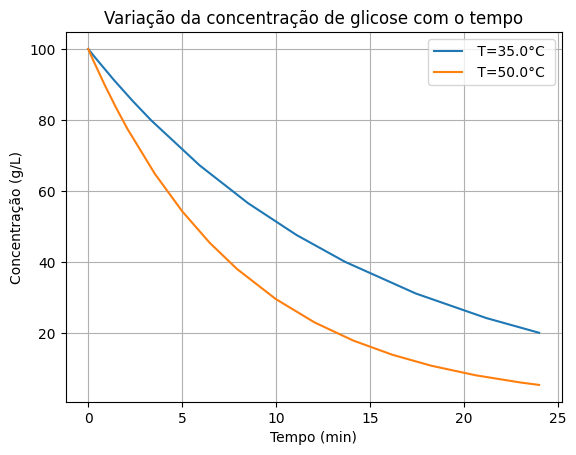

In [20]:
from dataclasses import dataclass
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

@dataclass
class FermentationPar:
  S0: float = 100.0      # concentração inicial de glicose [g/L]
  T: float = 35.0        # temperatura [°C]
  t_final: float = 24*60 # tempo final de simulação [min]


def k_value(T):
  k = 464.8*np.exp(-3985/(T+273))  # expressão para k[L/min]
  return k

def cinetica(t,S,params):
  dSdt = -k_value(params.T)*S   # cinética de primeira ordem
  return dSdt


def simultion_fermentation(params):
  tempo = (0,params.t_final)   # definição do tempo da simulação
  S0 = params.S0
  t_eval = np.linspace(0, params.t_final, 1000)
  sol = solve_ivp(cinetica, tempo, [S0], args=(params,), method='BDF')
  return sol.t,sol.y[0]


conjunto = [FermentationPar(),
            FermentationPar(T = 50.0)]  # Conjunto de diferentes cenários de temperatura


for params in conjunto:   # para cada temperatura
  t, S = simultion_fermentation(params)   # chamando a função
  T = params.T
  print(f"Concentração final em 24h a {T}°C: {S[-1]:.2f} g/L")
  plt.plot(t/60, S, label = f' T={T}°C ')   # Para que o plot seja em horas

plt.legend()
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (g/L)')
plt.title('Variação da concentração de glicose com o tempo')
plt.grid(True)
plt.show()


O valor final da concentração de glicose a 35ºC é de 20,01 g/L.

Quando eleva-se a temperatura para 50ºC, o consumo aumenta e, com isso, a concentração final da glicose diminui, sendo de 5,31 g/L.

##Questão 4

In [32]:
from dataclasses import dataclass

@dataclass
class Estagio:
    nome: str
    x: float     # fração molar líquida de etanol
    T: float     # temperatura em °C

def seletividade(T):
  alfa = 2.5 - 0.01*(T-78)
  return alfa

def equilibrio(alfa,x):
  alfa = seletividade(params.T)
  y = alfa*x/(1+x*(alfa-1))
  return y

estagios = [Estagio("Topo", 0.20, 78),
            Estagio("Alimentação", 0.40, 80),
            Estagio("Fundo", 0.60, 85)]

print(f"{'Estágio':<12}{'α(T)':>10}{'y':>10}")
for estagio in estagios:
        alpha = seletividade(estagio.T)
        y = equilibrio(alpha, estagio.x)
        print(f"{estagio.nome:<12}{alpha:>10.3f}{y:>10.3f}")

Estágio           α(T)         y
Topo             2.500     0.410
Alimentação      2.480     0.650
Fundo            2.430     0.807
